In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix
def create_combined_mask(img_cyto, img_nuc):
    """Create a combined mask with cytoplasm (gray) and nucleus (white)."""
    combined_mask = np.zeros_like(img_cyto, dtype=np.uint8)
    combined_mask[img_cyto > 0] = 128  # Gray for cytoplasm
    combined_mask[img_nuc > 0] = 255   # White for nucleus
    return combined_mask

def dice_coefficient(mask1, mask2):
    """Compute the Dice coefficient between two binary masks."""
    intersection = np.sum((mask1 > 0) & (mask2 > 0))
    sum_masks = np.sum(mask1 > 0) + np.sum(mask2 > 0)
    return (2. * intersection) / sum_masks if sum_masks != 0 else 1.0

def connectivit_8(image, limit, padd_size):
    """Perform 8-connectivity labeling."""
    height, width = image.shape
    connect_8 = np.zeros((height, width), dtype=np.int32)
    eq_list = {}
    label = 1

    for i in range(padd_size, height - padd_size):
        for j in range(padd_size, width - padd_size):
            if 0 <= image[i, j] <= limit:
                neighbors = []
                if connect_8[i, j - padd_size] > 0:
                    neighbors.append(connect_8[i, j - padd_size])
                if connect_8[i - padd_size, j] > 0:
                    neighbors.append(connect_8[i - padd_size, j])
                if connect_8[i - padd_size, j - padd_size] > 0:
                    neighbors.append(connect_8[i - padd_size, j - padd_size])
                if connect_8[i - padd_size, j + padd_size] > 0:
                    neighbors.append(connect_8[i - padd_size, j + padd_size])
                if not neighbors:
                    connect_8[i, j] = label
                    eq_list[label] = label
                    label += 1
                else:
                    min_label = min(neighbors)
                    connect_8[i, j] = min_label
                    for neighbor in neighbors:
                        eq_list[neighbor] = min_label

    for i in range(height):
        for j in range(width):
            if connect_8[i, j] > 0:
                connect_8[i, j] = eq_list[connect_8[i, j]]
    return connect_8
# Paths
image_path = r"E:\2. DIP\2. LAB\pythonProject\Projects\Assignment 2\wbc_data\Train\Basophil\Basophil_1.jpg"


In [3]:


def histogram(img):
    array = [0] * 256
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            pixel_val = int(img[i, j])
            array[pixel_val] += 1
    array = np.array(array)
    return array

def compute_confusion_matrix(pred_mask, gt_mask):
    pred_flat = pred_mask.flatten()
    gt_flat = gt_mask.flatten()


    labels = [0, 128, 255]

    cm = confusion_matrix(gt_flat, pred_flat, labels=labels)
    return cm
def histogram(img):
    array = [0] * 256
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            pixel_val = int(img[i, j])
            array[pixel_val] += 1
    array = np.array(array)
    return array


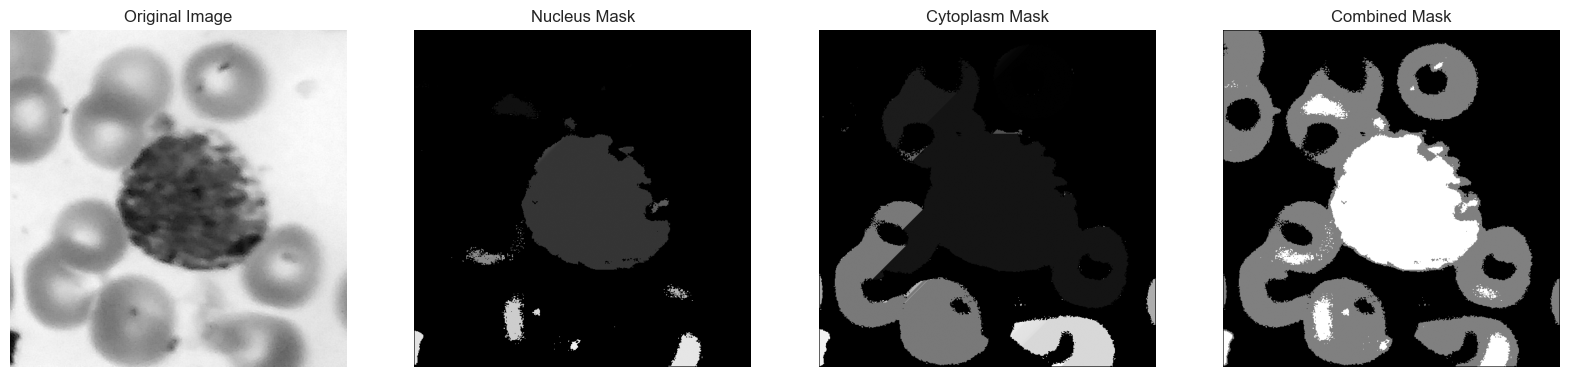

In [6]:
# Load images
original_image = cv2.imread(image_path, 0)

# Ensure images are loaded
if original_image  is None:
    raise FileNotFoundError("One or both files not found.")

# Compute thresholds
k1 = k2 = 1

valid_pixels = original_image[original_image < 255]
mean_intensity = np.mean(valid_pixels)
std_dev_intensity = np.std(valid_pixels)
nucleus_thresh = mean_intensity - k1 * std_dev_intensity
cytoplasm_thresh = mean_intensity

# Generate segmented images
img_cyto = connectivit_8(original_image, cytoplasm_thresh, 1)
img_nuc = connectivit_8(original_image, nucleus_thresh, 1)

# Generate combined mask
combined_mask = create_combined_mask(img_cyto, img_nuc)

# Compute Dice coefficient

# Plot images
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

axes[0].imshow(original_image, cmap='gray')
axes[0].set_title("Original Image")
axes[0].axis("off")

axes[1].imshow(img_nuc, cmap='gray')
axes[1].set_title("Nucleus Mask")
axes[1].axis("off")

axes[2].imshow(img_cyto, cmap='gray')
axes[2].set_title("Cytoplasm Mask")
axes[2].axis("off")

axes[3].imshow(combined_mask, cmap='gray')
axes[3].set_title("Combined Mask")
axes[3].axis("off")
plt.show()


In [8]:
np.unique(img_nuc)
plt.hist(img_nuc, bins=256)

(array([[575.,   0.,   0., ...,   0.,   0.,   0.],
        [517.,   0.,   0., ...,   0.,   0.,   0.],
        [517.,   0.,   0., ...,   0.,   0.,   0.],
        ...,
        [575.,   0.,   0., ...,   0.,   0.,   0.],
        [575.,   0.,   0., ...,   0.,   0.,   0.],
        [575.,   0.,   0., ...,   0.,   0.,   0.]], shape=(575, 256)),
 array([  0.     ,   1.28125,   2.5625 ,   3.84375,   5.125  ,   6.40625,
          7.6875 ,   8.96875,  10.25   ,  11.53125,  12.8125 ,  14.09375,
         15.375  ,  16.65625,  17.9375 ,  19.21875,  20.5    ,  21.78125,
         23.0625 ,  24.34375,  25.625  ,  26.90625,  28.1875 ,  29.46875,
         30.75   ,  32.03125,  33.3125 ,  34.59375,  35.875  ,  37.15625,
         38.4375 ,  39.71875,  41.     ,  42.28125,  43.5625 ,  44.84375,
         46.125  ,  47.40625,  48.6875 ,  49.96875,  51.25   ,  52.53125,
         53.8125 ,  55.09375,  56.375  ,  57.65625,  58.9375 ,  60.21875,
         61.5    ,  62.78125,  64.0625 ,  65.34375,  66.625  ,  67.90

Error in callback <function flush_figures at 0x00000272B69B0220> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

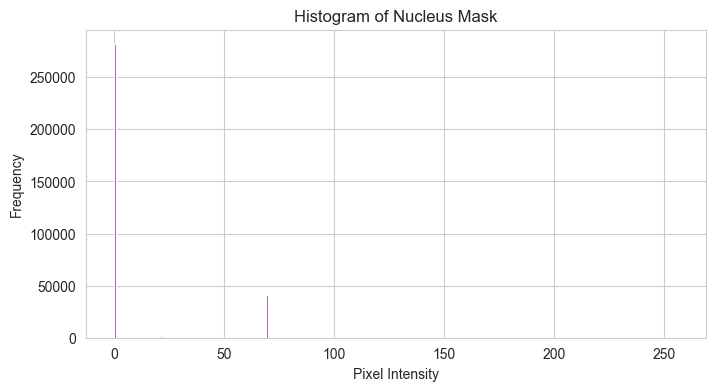

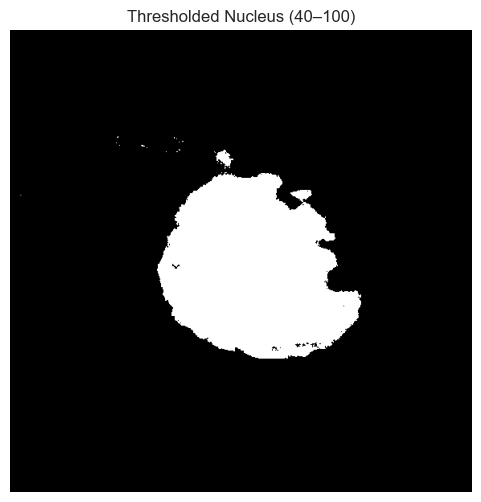

In [11]:
# Plot histogram of the nucleus mask
plt.figure(figsize=(8, 4))
plt.hist(img_nuc.ravel(), bins=256, range=(0, 256), color='purple')
plt.title("Histogram of Nucleus Mask")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()
# Apply threshold: white for 40–100, black otherwise
thresholded_nucleus = np.where((img_nuc >= 40) & (img_nuc <= 100), 255, 0).astype(np.uint8)

# Plot the thresholded result
plt.figure(figsize=(6, 6))
plt.imshow(thresholded_nucleus, cmap='gray')
plt.title("Thresholded Nucleus (40–100)")
plt.axis("off")
plt.show()


Threshold: 110.37920186453084


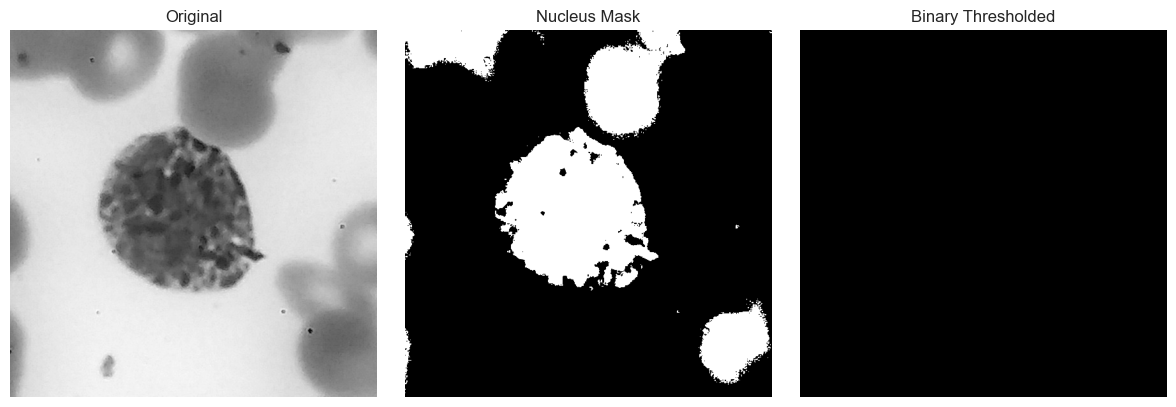

Threshold: 116.06956731225512


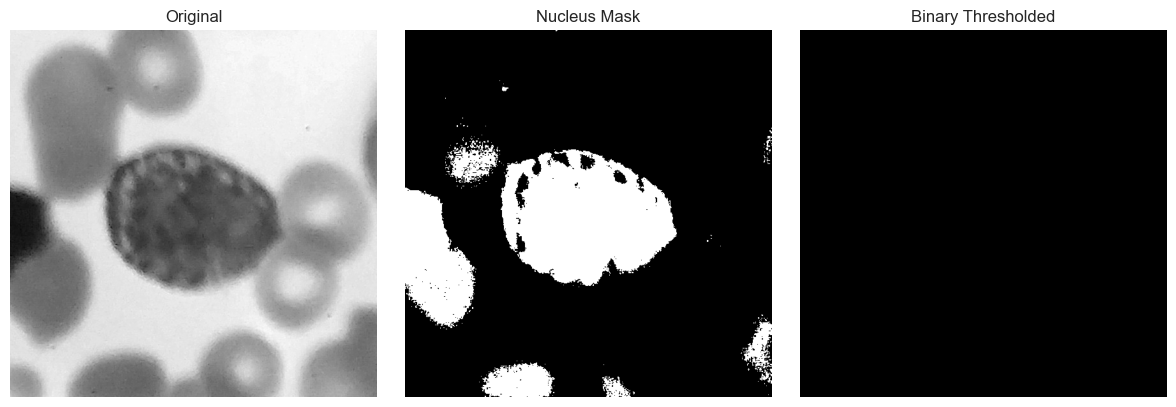

Threshold: 108.75926893047055


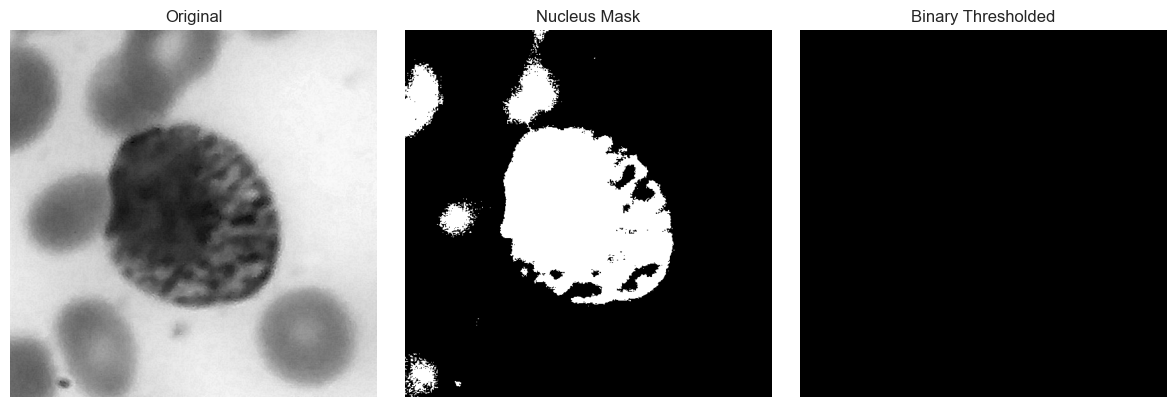

Threshold: 107.47856525981359


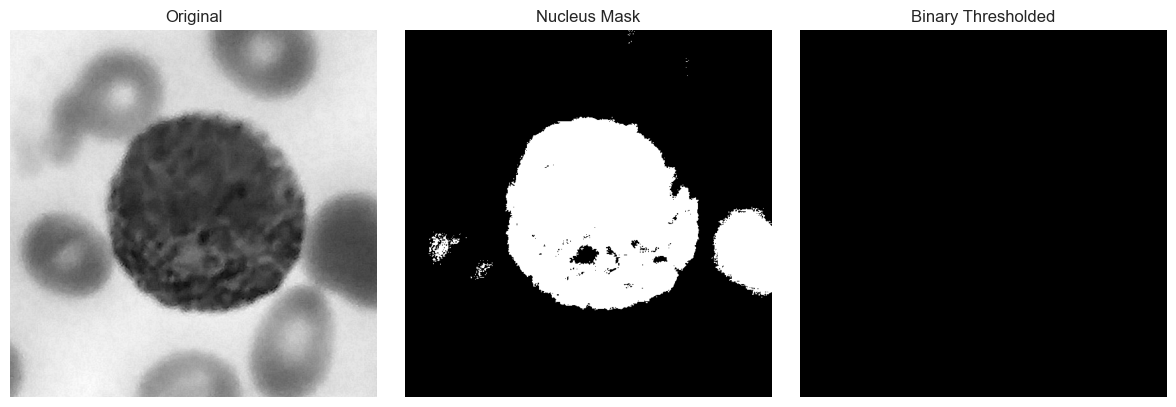

Threshold: 105.4309979693889


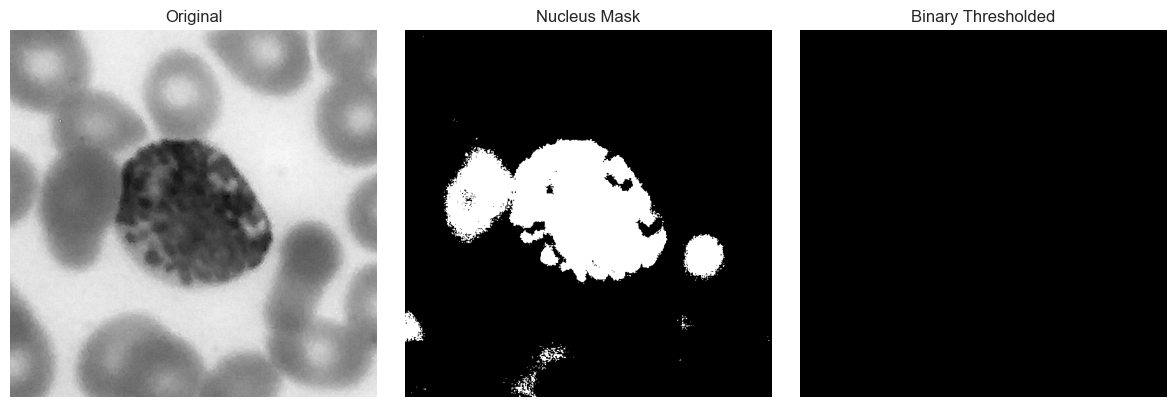

Threshold: 99.87381523523044


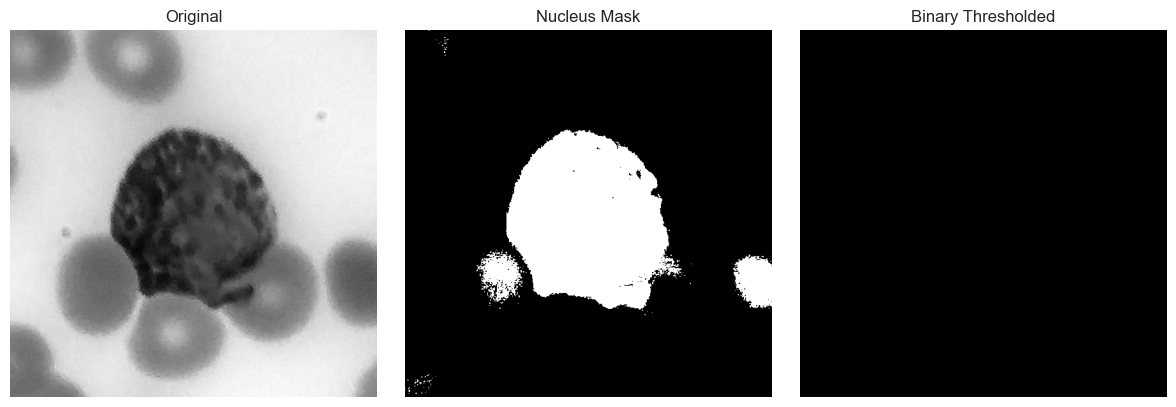

Threshold: 105.00381557477837


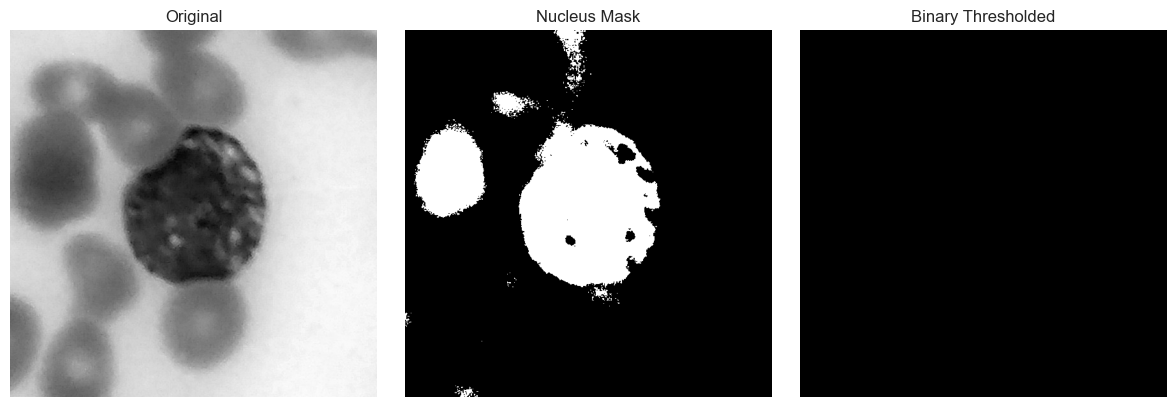

Threshold: 109.95191269480571


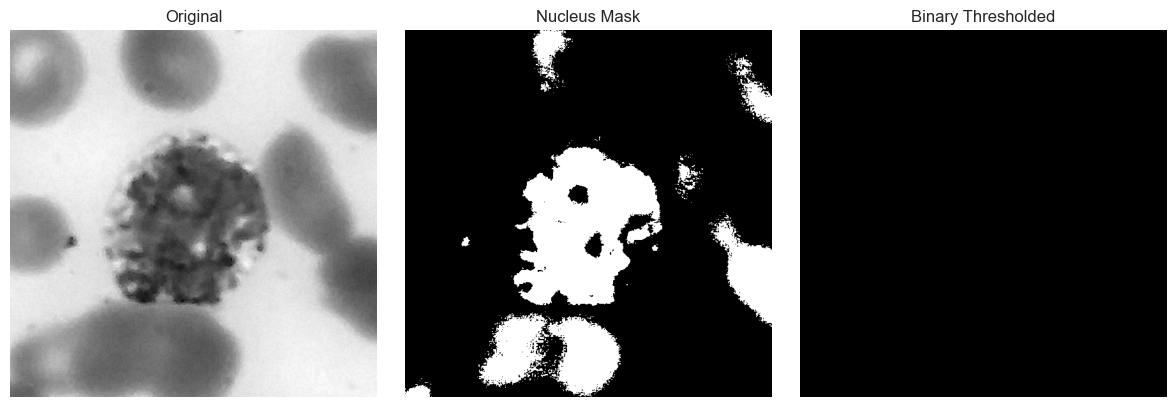

Threshold: 92.55738652488756


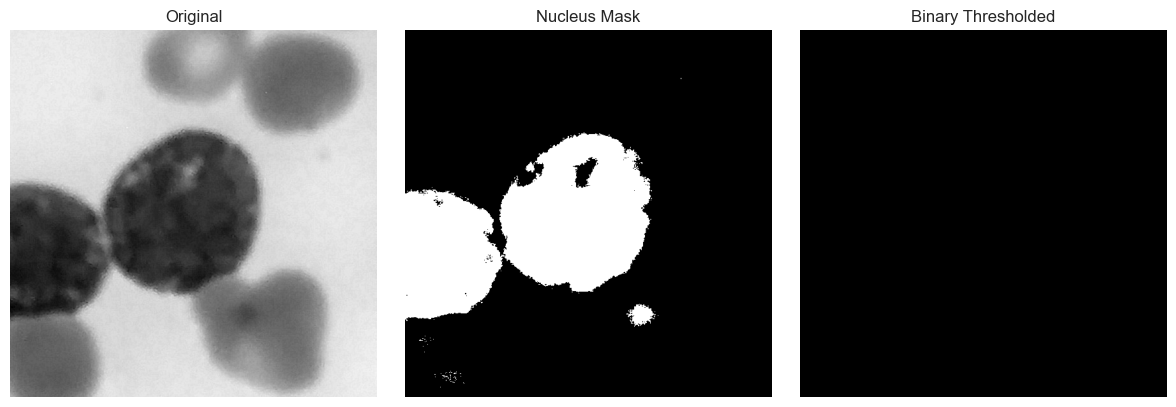

Threshold: 104.78132474291431


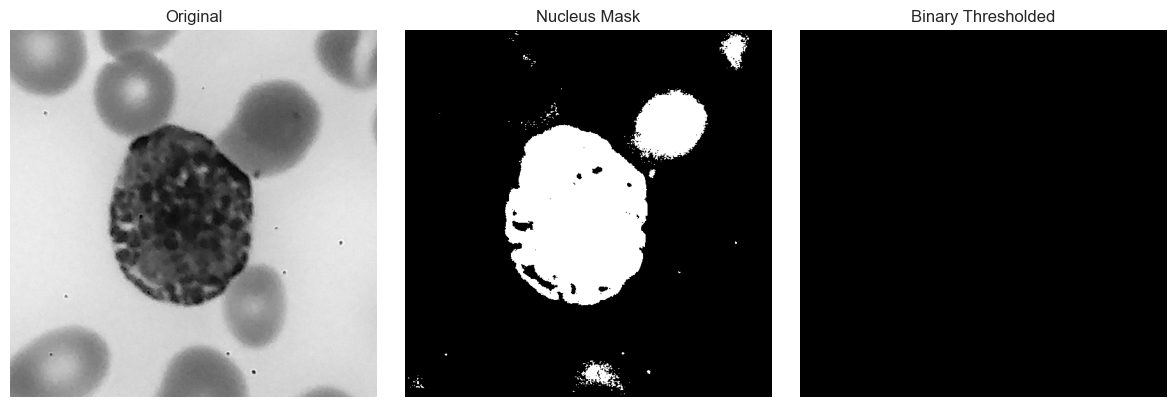

In [28]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

# Helper function: apply connectivity and threshold
def extract_nucleus_mask(image, k1=1):
    valid_pixels = image[image < 255]
    mean_intensity = np.mean(valid_pixels)
    std_dev_intensity = np.std(valid_pixels)
    nucleus_thresh = mean_intensity - k1 * std_dev_intensity
    print("Threshold:", nucleus_thresh)
    return connectivit_8(image, nucleus_thresh, 1)

# Directory containing images
image_dir = r"E:\2. DIP\2. LAB\pythonProject\Projects\Assignment 2\wbc_data\Train\Basophil"
image_files = [f for f in os.listdir(image_dir) if f.lower().endswith((".png", ".jpg", ".jpeg"))]

# Randomly sample 10 images
random_images = random.sample(image_files, 10)

for i, file in enumerate(random_images):
    img_path = os.path.join(image_dir, file)
    gray = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    if gray is None:
        continue

    # Apply connected component analysis for nucleus
    img_nuc = extract_nucleus_mask(gray)

    # Threshold to binary image in range [20, 150]
    thresholded_nucleus = np.where((img_nuc >= 20) & (img_nuc <= 150), 255, 0).astype(np.uint8)

    # Plot original, nucleus mask, and binary image
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 3, 1)
    plt.imshow(gray, cmap='gray')
    plt.title("Original")
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(img_nuc, cmap='gray')
    plt.title("Nucleus Mask")
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(thresholded_nucleus, cmap='gray')
    plt.title("Binary Thresholded")
    plt.axis('off')

    plt.tight_layout()
    plt.show()